# Import Necessary Libraries

In [104]:
# Import necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras import layers, models

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

# For nicer sklearn output
from sklearn import set_config
set_config(transform_output="pandas")  # make transformers return DataFrames

sns.set(style="whitegrid")


# Data Loading

In [105]:
# Data paths
PATH_COLUMNS = "/content/census-bureau.columns"
PATH_DATA = "/content/census-bureau.data"

# Load columns and data
df_c = pd.read_csv(PATH_COLUMNS, header=None)
df_d = pd.read_csv(PATH_DATA, header=None)

In [106]:
df_d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [107]:
df_d.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Not in labor force,0,0,0,Joint both 65+,Not in universe,Not in universe,Householder,Householder,955.27,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,6418,0,9,Joint one under 65 & one 65+,Not in universe,Not in universe,Householder,Householder,687.19,Nonmover,Nonmover,Nonmover,Yes,Not in universe,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,157,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1923.03,?,?,?,Not in universe under 1 year old,?,6,Not in universe,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,- 50000.
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,4664.87,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
199522,32,Private,42,30,High school graduate,0,Not in universe,Never married,Medical except hospital,Other service,Black,All other,Female,No,Not in universe,Children or Armed Forces,0,0,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,1830.11,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,?,?,?,Foreign born- Not a citizen of U S,0,Not in universe,2,52,94,- 50000.


In [108]:
df_c

,0
0,age
1,class of worker
2,detailed industry recode
3,detailed occupation recode
4,education
5,wage per hour
6,enroll in edu inst last wk
7,marital stat
8,major industry code
9,major occupation code


In [109]:
# Assign column names
colnames = df_c[0].tolist()

df_d.columns = colnames

df_d.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [110]:
# Check data
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_d.head()


,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


# Sanity Check of Data

In [111]:
# Shape
df_d.shape

(199523, 42)

In [112]:
# Info()
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital stat                                199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

In [113]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       42 non-null     object
dtypes: object(1)
memory usage: 468.0+ bytes


In [114]:
# Find N/A
df_d.isnull().sum()

,0
age,0
class of worker,0
detailed industry recode,0
detailed occupation recode,0
education,0
wage per hour,0
enroll in edu inst last wk,0
marital stat,0
major industry code,0
major occupation code,0


In [115]:
df_d["hispanic origin"].unique()

array(['All other', 'Do not know', 'Central or South American',
       'Mexican (Mexicano)', 'Mexican-American', 'Other Spanish',
       'Puerto Rican', 'Cuban', 'Chicano', nan], dtype=object)

In [116]:
# Fill N/A
print("Before:", df_d["hispanic origin"].isna().sum())
df_d["hispanic origin"] = df_d["hispanic origin"].fillna("Do not know")
df_d["hispanic origin"].value_counts(dropna=False)


Before: 874


,count
hispanic origin,
All other,171907
Mexican-American,8079
Mexican (Mexicano),7234
Central or South American,3895
Puerto Rican,3313
Other Spanish,2485
Do not know,1180
Cuban,1126
Chicano,304


In [117]:
# Find duplicates
df_d.duplicated().sum()

np.int64(3229)

In [118]:
# Remove duplicated
df_d.drop_duplicates(keep="first", inplace=True)

In [119]:
df_d.duplicated().sum()

np.int64(0)

In [120]:
df_d.shape

(196294, 42)

In [121]:
# Convert income label to binary 0/1
# Original last column is income like " - 50000." or " 50000+."
label_col = df_d.columns[-1]

# Strip spaces and map to binary income
df_d[label_col] = df_d[label_col].astype(str).str.strip()
df_d["income_tmp"] = df_d[label_col].apply(lambda x: 0 if x.startswith("-") else 1)

print("\nIncome value counts (0/1):")
print(df_d["income_tmp"].value_counts())

# Replace original label with binary label named "label"
df_d = df_d.drop(columns=[label_col])
df_d = df_d.rename(columns={"income_tmp": "label"})

# Check duplicates (for sanity, not used later)
print("\nNumber of duplicated rows:", df_d.duplicated().sum())


Income value counts (0/1):
income_tmp
0    183912
1     12382
Name: count, dtype: int64

Number of duplicated rows: 0


# Exploratory Data Analysis(EDA)

In [122]:
# Descriptive statistics
df_d.describe().T

,count,mean,std,min,25%,50%,75%,max
age,196294.0,34.929468,22.210001,0.00,16.00,34.000,50.00,90.0
detailed industry recode,196294.0,15.603187,18.106401,0.00,0.00,1.000,33.00,51.0
detailed occupation recode,196294.0,11.490468,14.498128,0.00,0.00,2.000,26.00,46.0
wage per hour,196294.0,56.336505,277.054333,0.00,0.00,0.000,0.00,9999.0
capital gains,196294.0,441.870037,4735.677027,0.00,0.00,0.000,0.00,99999.0
capital losses,196294.0,37.927593,274.081174,0.00,0.00,0.000,0.00,4608.0
dividends from stocks,196294.0,200.722386,2000.130616,0.00,0.00,0.000,0.00,99999.0
weight,196294.0,1743.267584,996.945985,37.87,1061.53,1620.175,2194.06,18656.3
num persons worked for employer,196294.0,1.988105,2.371018,0.00,0.00,1.000,4.00,6.0
own business or self employed,196294.0,0.178304,0.557739,0.00,0.00,0.000,0.00,2.0


In [123]:
df_d.describe(include = "object")

,class of worker,education,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,fill inc questionnaire for veteran's admin
count,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294
unique,9,17,3,7,24,15,5,9,2,3,6,8,6,6,51,38,8,10,9,10,3,4,5,43,43,43,5,3
top,Not in universe,High school graduate,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Not in universe,Householder,Householder,?,?,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
freq,97029,48374,183762,84194,97467,97467,164380,168803,102400,177232,190226,120632,71903,180562,180562,53242,75461,98015,98015,98015,99434,98015,144161,156037,157355,173783,173786,194310


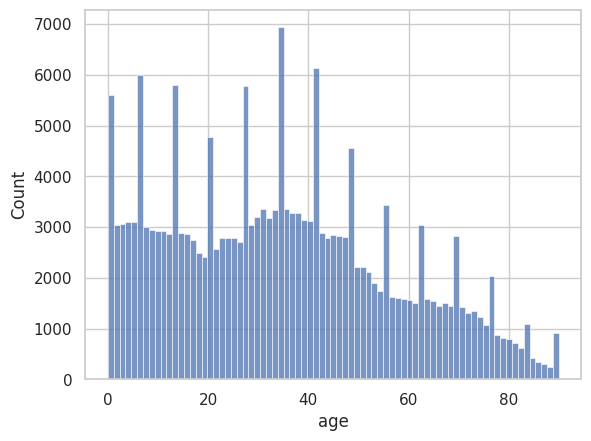

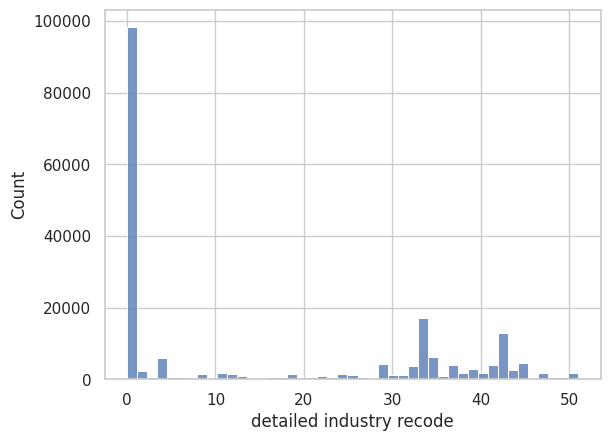

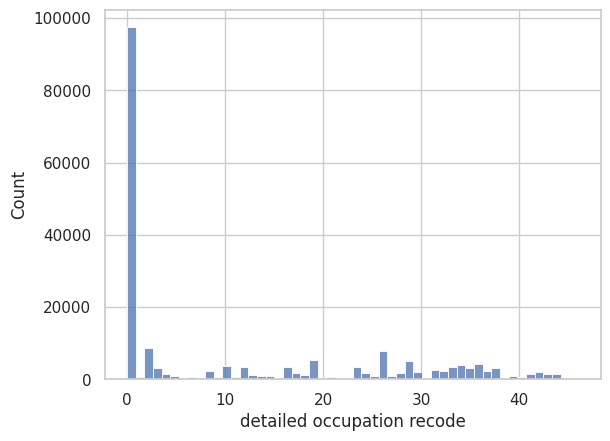

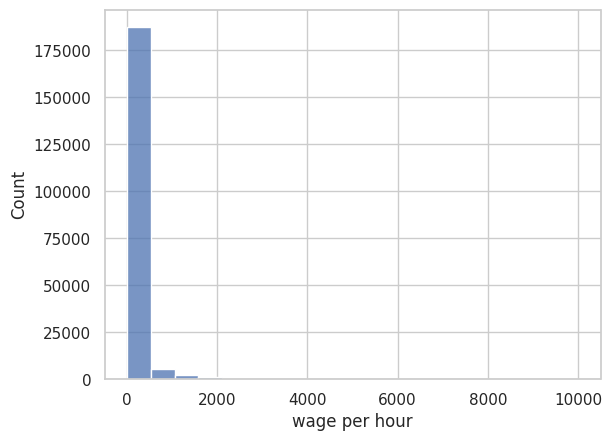

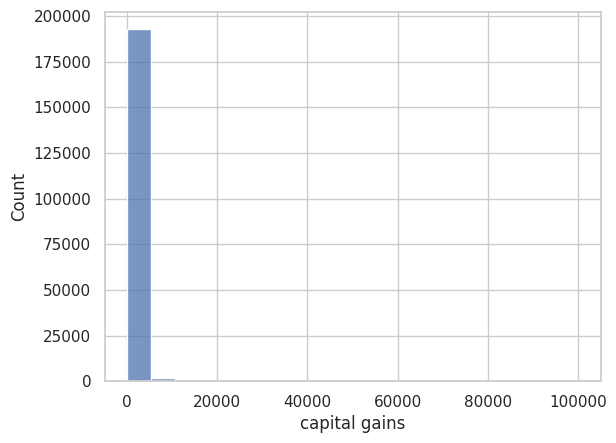

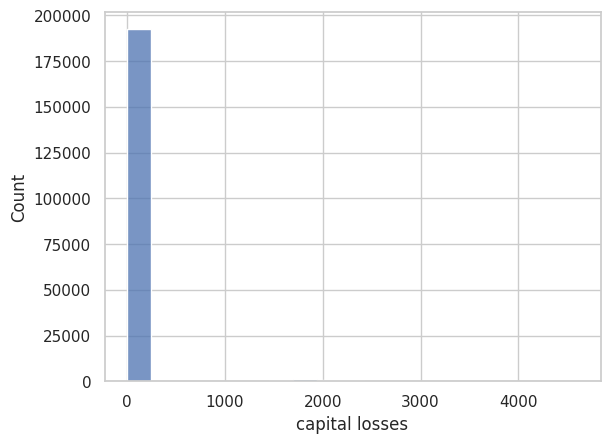

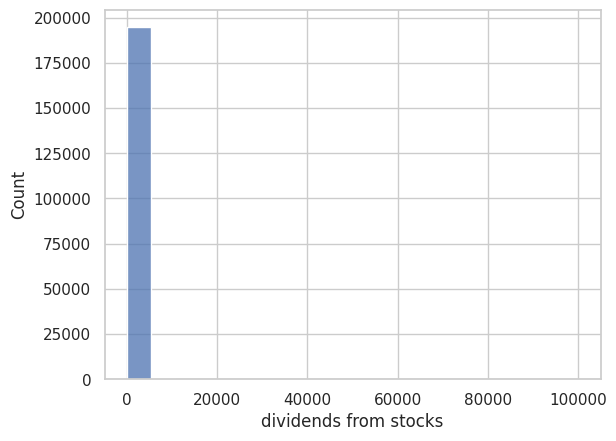

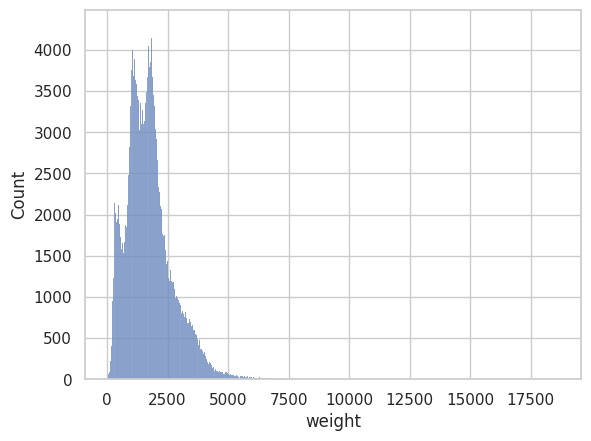

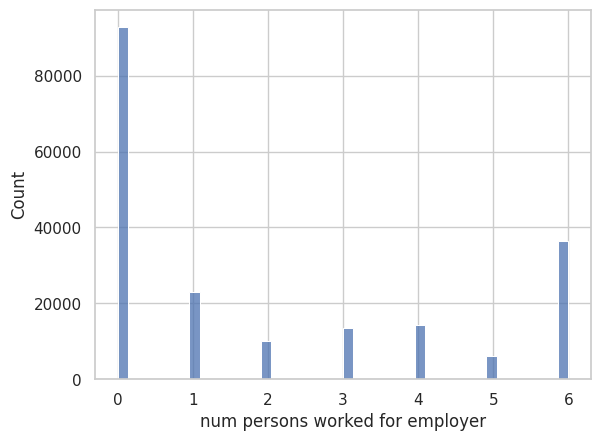

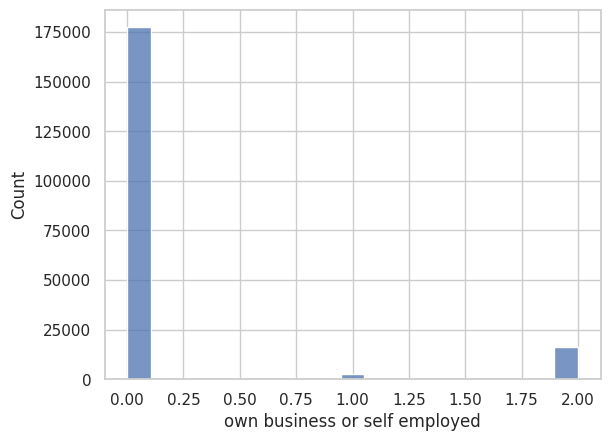

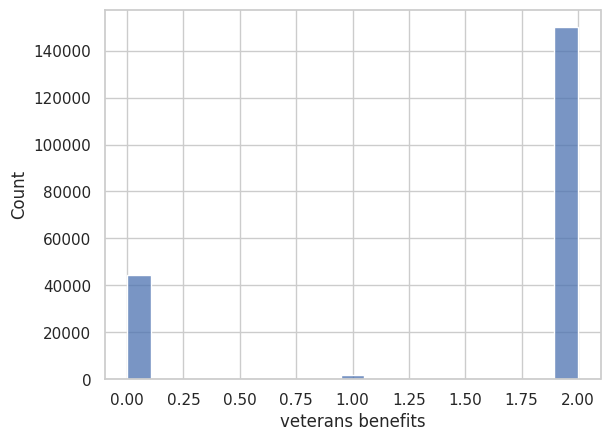

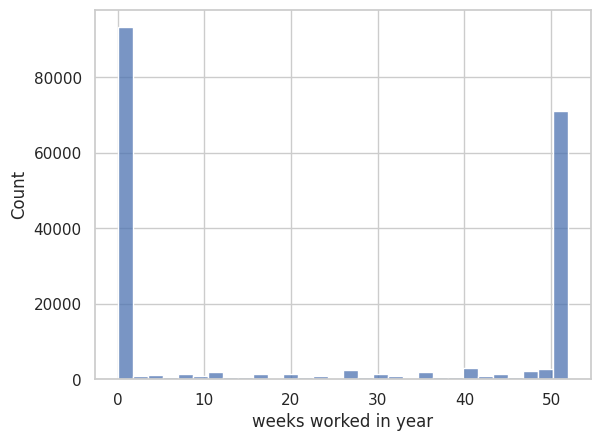

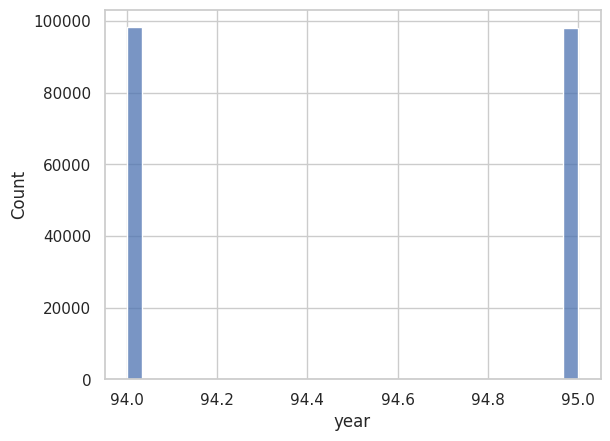

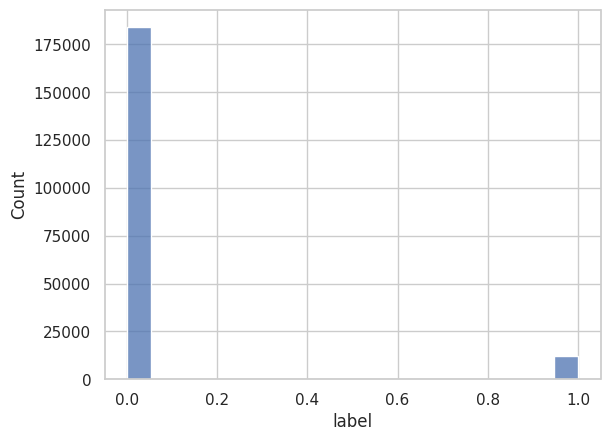

In [124]:
# histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in df_d.select_dtypes(include="number").columns:
  sns.histplot(data = df_d, x = i)
  plt.show()

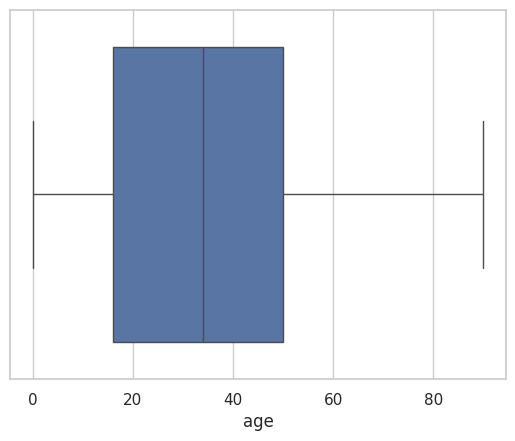

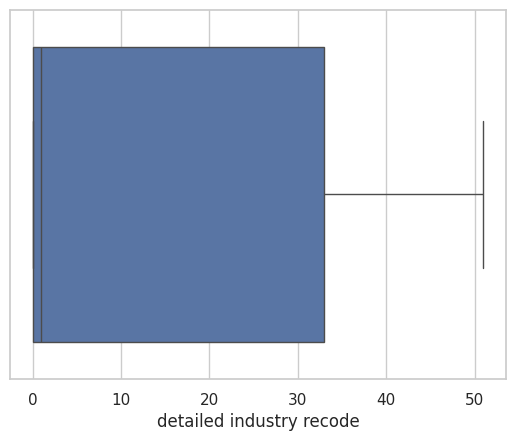

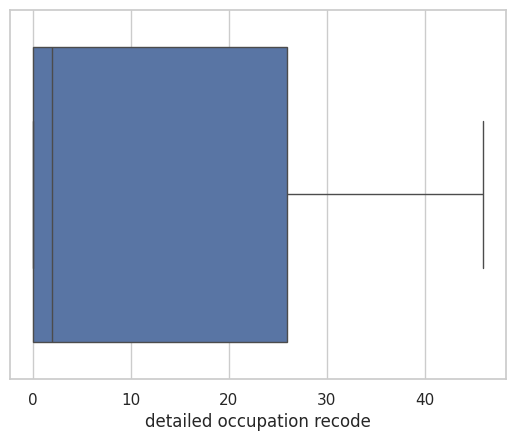

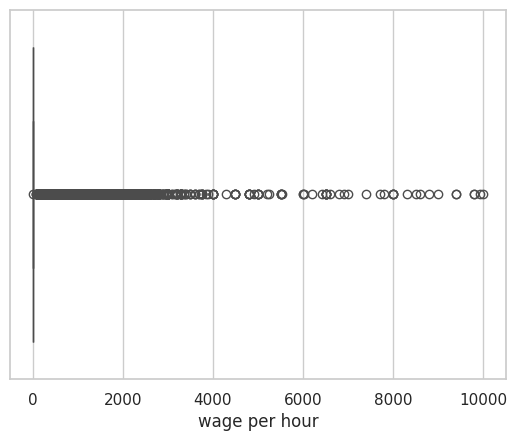

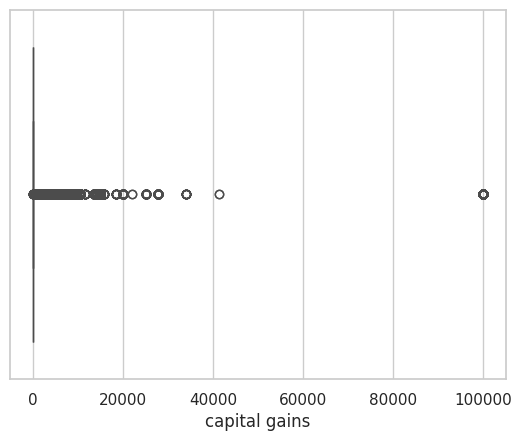

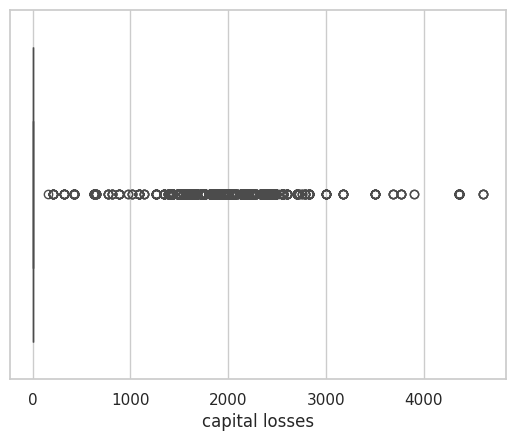

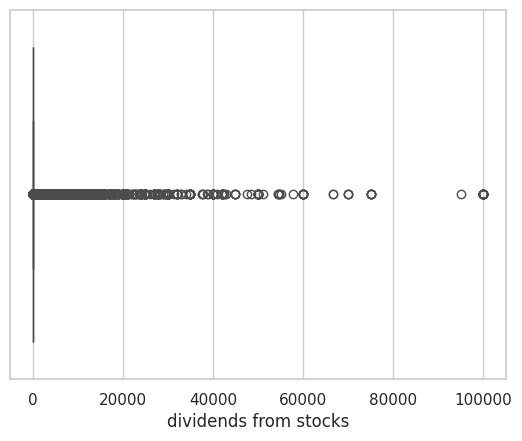

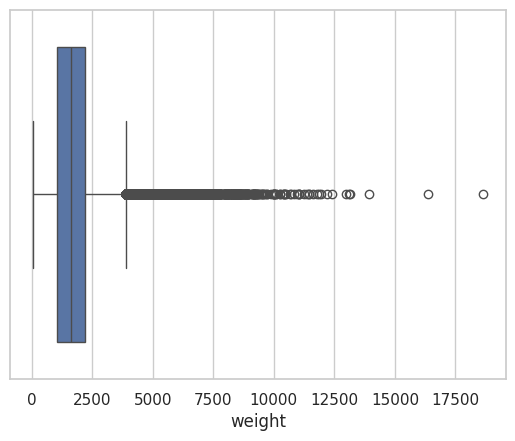

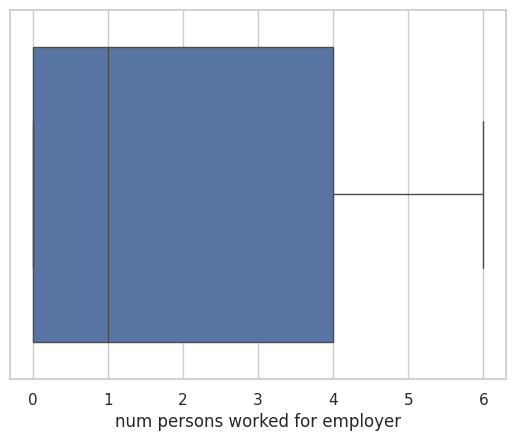

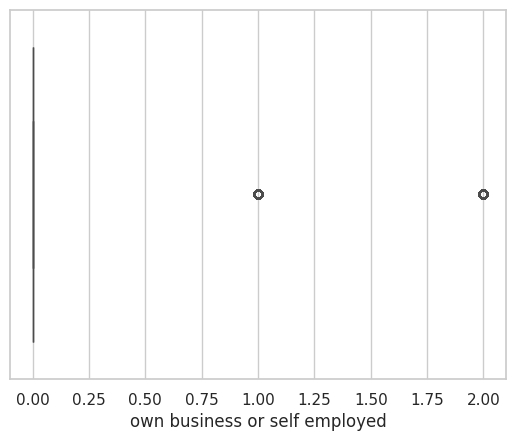

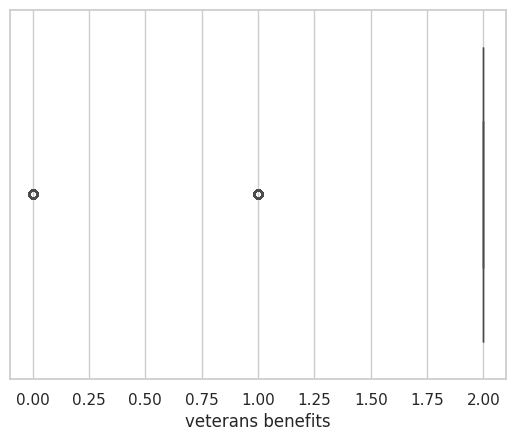

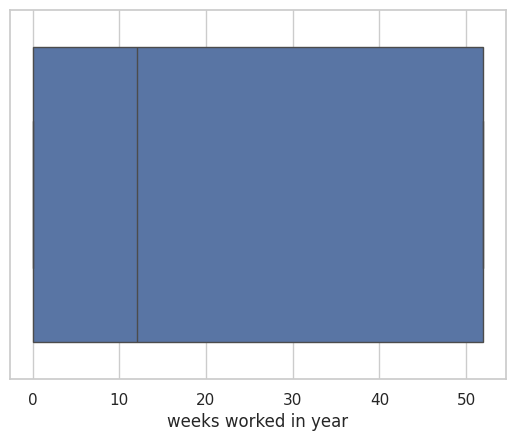

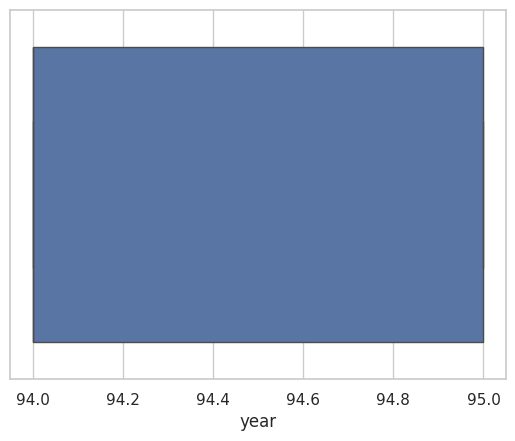

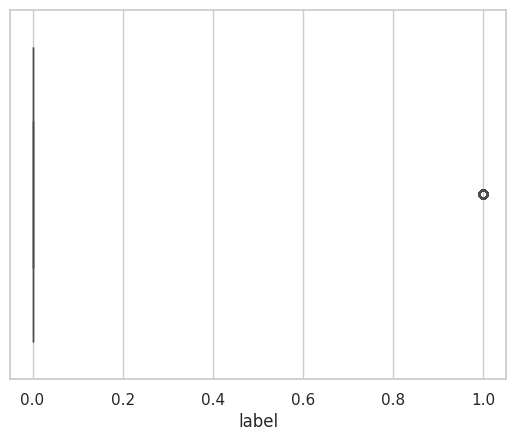

In [125]:
# Boxplot-to-identity Outliers
import warnings
warnings.filterwarnings("ignore")
for i in df_d.select_dtypes(include="number").columns:
  sns.boxplot(data = df_d, x = i)
  plt.show()

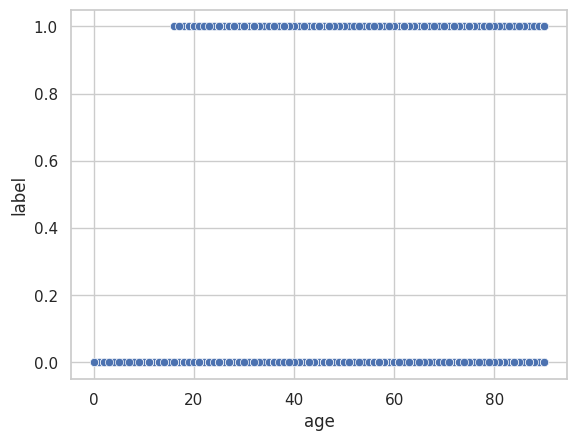

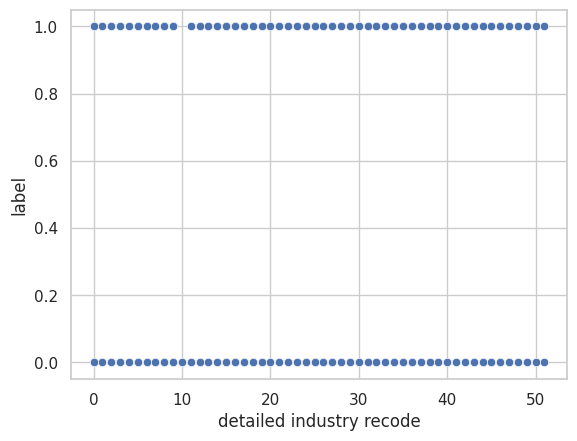

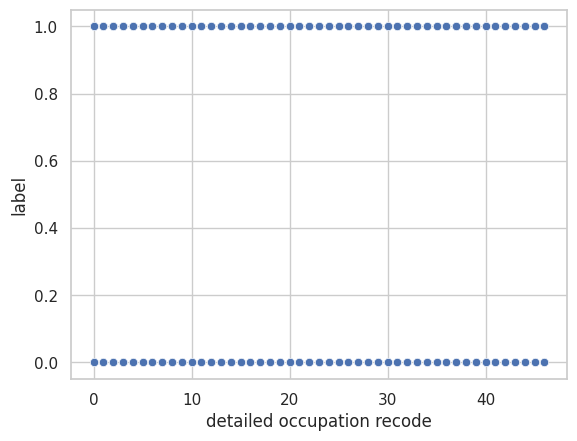

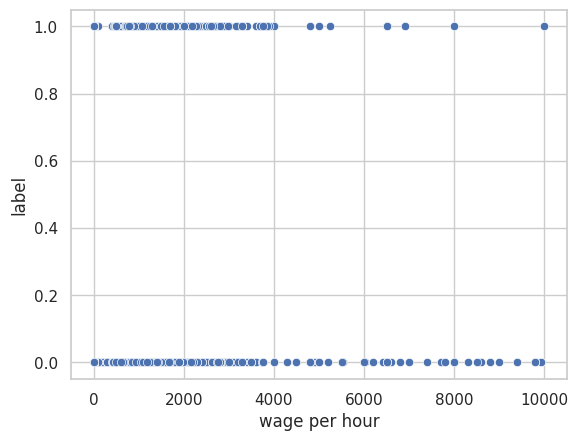

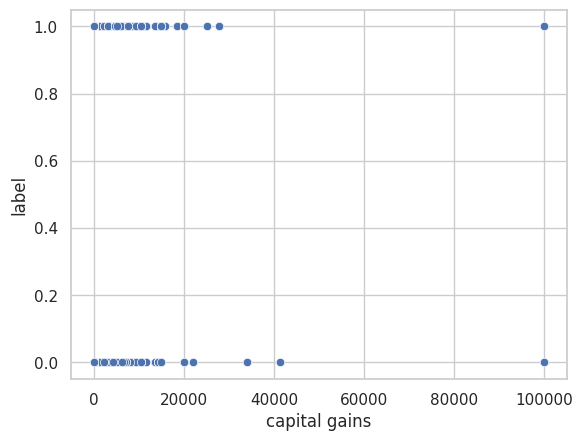

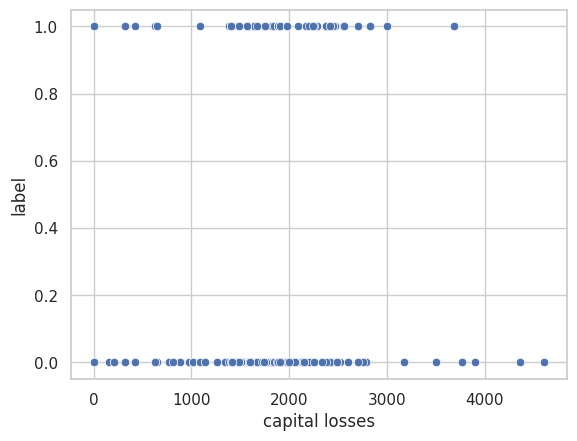

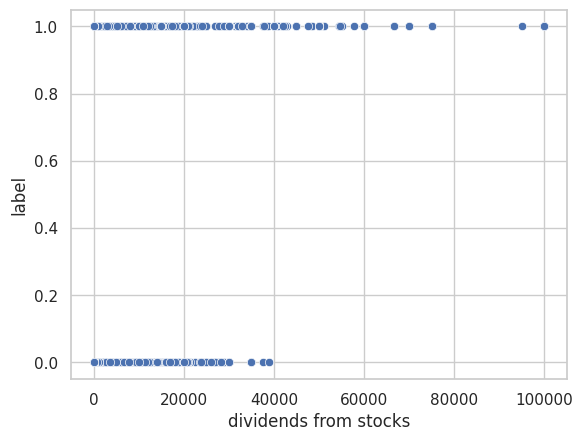

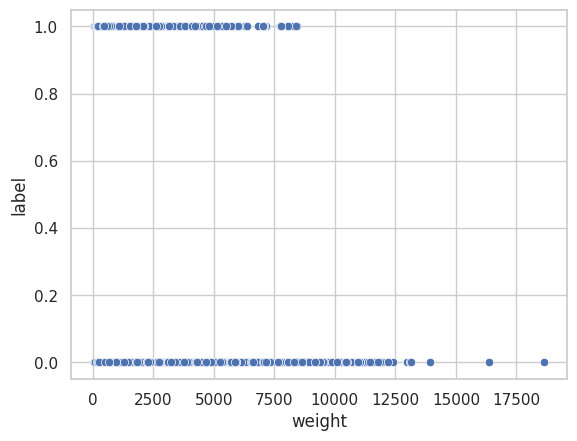

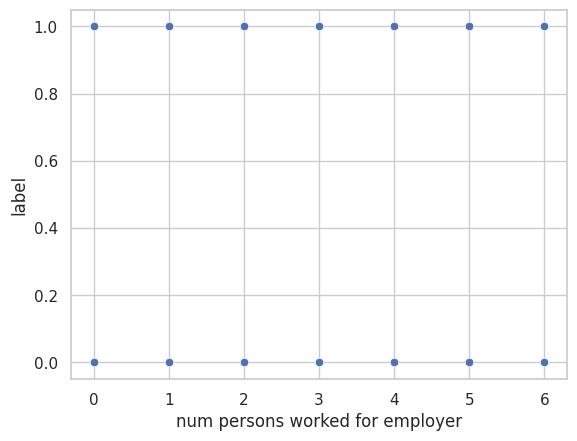

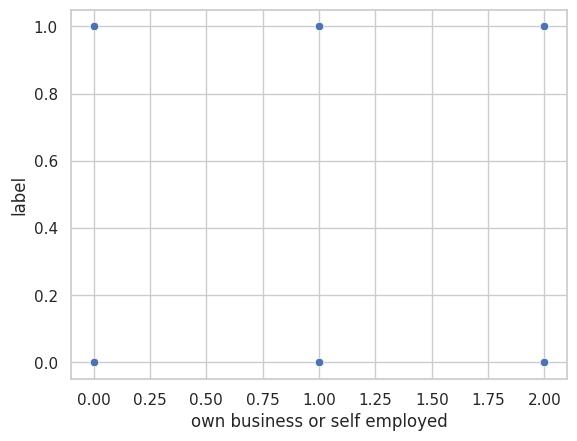

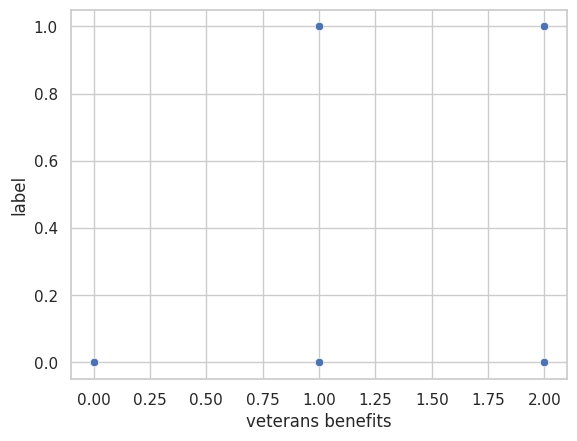

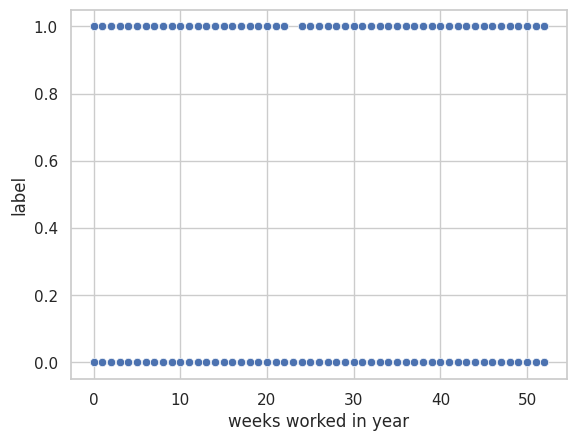

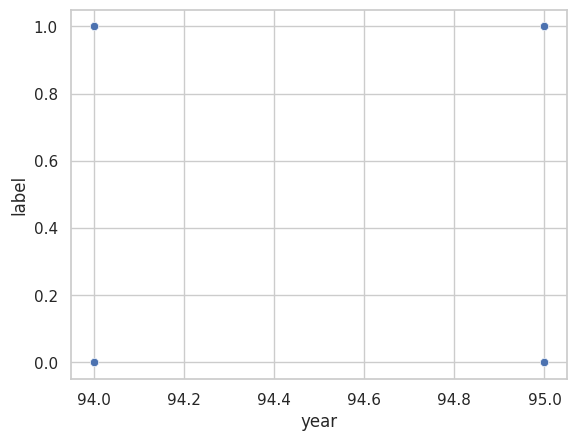

In [126]:
# Scatter plot to understand the relationship
for i in['age', 'detailed industry recode', 'detailed occupation recode', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'weight', 'num persons worked for employer', 'own business or self employed', 'veterans benefits', 'weeks worked in year', 'year']:
  sns.scatterplot(data = df_d, x = i, y = 'label')
  plt.show()

In [127]:
df_d.select_dtypes(include = "number").columns

Index(['age', 'detailed industry recode', 'detailed occupation recode',
       'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'weight', 'num persons worked for employer',
       'own business or self employed', 'veterans benefits',
       'weeks worked in year', 'year', 'label'],
      dtype='object')

In [128]:
# Correlation
df_d.select_dtypes(include = "number").corr()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,label
age,1.000000,0.143959,0.104064,0.033444,0.052450,0.061458,0.104382,-0.005060,0.127132,-0.008539,0.665640,0.191514,0.005293,0.132443
detailed industry recode,0.143959,1.000000,0.558724,0.164205,0.065125,0.071116,0.011481,0.027235,0.638001,0.249957,0.467630,0.751296,0.004028,0.193880
detailed occupation recode,0.104064,0.558724,1.000000,0.192973,0.001364,0.042156,-0.028122,0.025055,0.510477,0.226223,0.430136,0.651583,-0.002709,0.010199
wage per hour,0.033444,0.164205,0.192973,1.000000,-0.001389,0.010544,-0.006058,0.011834,0.189946,0.053075,0.110379,0.194068,0.002434,0.023698
capital gains,0.052450,0.065125,0.001364,-0.001389,1.000000,-0.012912,0.131355,0.002291,0.057093,0.014583,0.050262,0.082733,0.005351,0.240481
capital losses,0.061458,0.071116,0.042156,0.010544,-0.012912,1.000000,0.042219,0.007693,0.082884,0.023430,0.073491,0.099385,0.000192,0.146939
dividends from stocks,0.104382,0.011481,-0.028122,-0.006058,0.131355,0.042219,1.000000,-0.000298,0.005866,-0.005396,0.053187,0.012387,0.001975,0.175486
weight,-0.005060,0.027235,0.025055,0.011834,0.002291,0.007693,-0.000298,1.000000,0.040853,0.011486,0.036679,0.026802,0.011834,0.013791
num persons worked for employer,0.127132,0.638001,0.510477,0.189946,0.057093,0.082884,0.005866,0.040853,1.000000,0.237844,0.454556,0.744172,0.019574,0.220579
own business or self employed,-0.008539,0.249957,0.226223,0.053075,0.014583,0.023430,-0.005396,0.011486,0.237844,1.000000,0.173254,0.263121,0.007664,0.039197


# Data Preprocessing

In [129]:
# Determine whether "object" columns are categorical

obj_cols = df_d.select_dtypes(include="object").columns
n_rows = len(df_d)

categorical_cols = []
string_like_cols = []

for col in obj_cols:
    n_unique = df_d[col].nunique()
    ratio = n_unique / n_rows  # use column-specific ratio

    # Print basic info for this column
    print(f"{col:30s}  unique = {n_unique:6d}, ratio = {ratio:8.4f}")

    # Classify column
    if ratio < 0.01:
        categorical_cols.append(col)
    else:
        string_like_cols.append(col)

print("\nCategorical columns:")
print(categorical_cols)
print("Count:", len(categorical_cols))

print("\nString-like columns:")
print(string_like_cols)


class of worker                 unique =      9, ratio =   0.0000
education                       unique =     17, ratio =   0.0001
enroll in edu inst last wk      unique =      3, ratio =   0.0000
marital stat                    unique =      7, ratio =   0.0000
major industry code             unique =     24, ratio =   0.0001
major occupation code           unique =     15, ratio =   0.0001
race                            unique =      5, ratio =   0.0000
hispanic origin                 unique =      9, ratio =   0.0000
sex                             unique =      2, ratio =   0.0000
member of a labor union         unique =      3, ratio =   0.0000
reason for unemployment         unique =      6, ratio =   0.0000
full or part time employment stat  unique =      8, ratio =   0.0000
tax filer stat                  unique =      6, ratio =   0.0000
region of previous residence    unique =      6, ratio =   0.0000
state of previous residence     unique =     51, ratio =   0.0003
detaile

In [130]:
# y = binary income label (0/1)
y = df_d["label"]

# X = all features except label
X = df_d.drop(columns=["label"])

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Build preprocessing pipeline:
#   - numeric: passthrough
#   - categorical: OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ]
)

# Train / test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

# Fit preprocessor only on training data
preprocessor.fit(X_train)

# One-hot encode + concatenate
X_train_enc = preprocessor.transform(X_train)
X_test_enc = preprocessor.transform(X_test)

print("\nEncoded training shape:", X_train_enc.shape)
print("Encoded testing shape:", X_test_enc.shape)


Numeric columns: ['age', 'detailed industry recode', 'detailed occupation recode', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'weight', 'num persons worked for employer', 'own business or self employed', 'veterans benefits', 'weeks worked in year', 'year']
Categorical columns: ['class of worker', 'education', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'ci

In [131]:
print(type(X_train_enc))
X_train_enc.head()

<class 'pandas.core.frame.DataFrame'>


,num__age,num__detailed industry recode,num__detailed occupation recode,num__wage per hour,num__capital gains,num__capital losses,num__dividends from stocks,num__weight,num__num persons worked for employer,num__own business or self employed,num__veterans benefits,num__weeks worked in year,num__year,cat__class of worker_Federal government,cat__class of worker_Local government,cat__class of worker_Never worked,cat__class of worker_Not in universe,cat__class of worker_Private,cat__class of worker_Self-employed-incorporated,cat__class of worker_Self-employed-not incorporated,cat__class of worker_State government,cat__class of worker_Without pay,cat__education_10th grade,cat__education_11th grade,cat__education_12th grade no diploma,cat__education_1st 2nd 3rd or 4th grade,cat__education_5th or 6th grade,cat__education_7th and 8th grade,cat__education_9th grade,cat__education_Associates degree-academic program,cat__education_Associates degree-occup /vocational,cat__education_Bachelors degree(BA AB BS),cat__education_Children,cat__education_Doctorate degree(PhD EdD),cat__education_High school graduate,cat__education_Less than 1st grade,cat__education_Masters degree(MA MS MEng MEd MSW MBA),cat__education_Prof school degree (MD DDS DVM LLB JD),cat__education_Some college but no degree,cat__enroll in edu inst last wk_College or university,cat__enroll in edu inst last wk_High school,cat__enroll in edu inst last wk_Not in universe,cat__marital stat_Divorced,cat__marital stat_Married-A F spouse present,cat__marital stat_Married-civilian spouse present,cat__marital stat_Married-spouse absent,cat__marital stat_Never married,cat__marital stat_Separated,cat__marital stat_Widowed,cat__major industry code_Agriculture,cat__major industry code_Armed Forces,cat__major industry code_Business and repair services,cat__major industry code_Communications,cat__major industry code_Construction,cat__major industry code_Education,cat__major industry code_Entertainment,cat__major industry code_Finance insurance and real estate,cat__major industry code_Forestry and fisheries,cat__major industry code_Hospital services,cat__major industry code_Manufacturing-durable goods,cat__major industry code_Manufacturing-nondurable goods,cat__major industry code_Medical except hospital,cat__major industry code_Mining,cat__major industry code_Not in universe or children,cat__major industry code_Other professional services,cat__major industry code_Personal services except private HH,cat__major industry code_Private household services,cat__major industry code_Public administration,cat__major industry code_Retail trade,cat__major industry code_Social services,cat__major industry code_Transportation,cat__major industry code_Utilities and sanitary services,cat__major industry code_Wholesale trade,cat__major occupation code_Adm support including clerical,cat__major occupation code_Armed Forces,cat__major occupation code_Executive admin and managerial,cat__major occupation code_Farming forestry and fishing,cat__major occupation code_Handlers equip cleaners etc,cat__major occupation code_Machine operators assmblrs & inspctrs,cat__major occupation code_Not in universe,cat__major occupation code_Other service,cat__major occupation code_Precision production craft & repair,cat__major occupation code_Private household services,cat__major occupation code_Professional specialty,cat__major occupation code_Protective services,cat__major occupation code_Sales,cat__major occupation code_Technicians and related support,cat__major occupation code_Transportation and material moving,cat__race_Amer Indian Aleut or Eskimo,cat__race_Asian or Pacific Islander,cat__race_Black,cat__race_Other,cat__race_White,cat__hispanic origin_All other,cat__hispanic origin_Central or South American,cat__hispanic origin_Chicano,cat__hispanic origin_Cuban,cat__hispanic origin_Do not know,cat__hispanic origin_Mexican (Mexicano),cat__hispanic origin_Mexican-American,cat__hispanic origin_Other Spanish,cat__hispanic origi

In [132]:
preprocessor

ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['age', 'detailed industry recode',
                                  'detailed occupation recode', 'wage per hour',
                                  'capital gains', 'capital losses',
                                  'dividends from stocks', 'weight',
                                  'num persons worked for employer',
                                  'own business or self employed',
                                  'veterans benefits', 'weeks worked in year',
                                  'year']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_outp...
                                  'detailed household and family stat',
                                  'detailed household summary in household',
                                  'migration code-change in msa',
                                  'migration code-change in reg',
                                  'migration code-move within reg',
                                  'live in this house 1 year ago',
                                  'migration prev res in sunbelt',
                                  'family members under 18',
                                  'country of birth father',
                                  'country of birth mother',
                                  'country of birth self', 'citizenship',
                                  "fill inc questionnaire for veteran's "
                                  'admin'])])

# Model Training

## Generic Evaluation Function

In [133]:
def evaluate_classifier(
    name,
    y_true,
    y_pred,
    labels=None,
    target_names=None,
    average=None,
    show_plot=True
):

    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # --- decide average type automatically if not provided ---
    if average is None:
        n_classes = np.unique(y_true).size
        average = "binary" if n_classes == 2 else "macro"

    # --- compute metrics ---
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average=average, zero_division=0)
    rec  = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1   = f1_score(y_true, y_pred, average=average, zero_division=0)

    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}  (average='{average}')")
    print(f"Recall   : {rec:.4f}  (average='{average}')")
    print(f"F1-score : {f1:.4f}  (average='{average}')")

    print("\nClassification report:")
    print(classification_report(
        y_true, y_pred,
        target_names=target_names,
        zero_division=0
    ))

    # --- confusion matrix ---
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    print("Confusion matrix:\n", cm)

    # --- plot confusion matrix heatmap ---
    if show_plot:
        plt.figure(figsize=(5, 4))

        tick_labels = target_names if target_names is not None else labels

        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=tick_labels,
            yticklabels=tick_labels
        )
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        plt.title(f"Confusion Matrix - {name}")
        plt.tight_layout()
        plt.show()


## Logistic Regression (Baseline)


=== Logistic Regression ===
Accuracy : 0.9476
Precision: 0.6872  (average='binary')
Recall   : 0.3106  (average='binary')
F1-score : 0.4278  (average='binary')

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     36783
           1       0.69      0.31      0.43      2476

    accuracy                           0.95     39259
   macro avg       0.82      0.65      0.70     39259
weighted avg       0.94      0.95      0.94     39259

Confusion matrix:
 [[36433   350]
 [ 1707   769]]


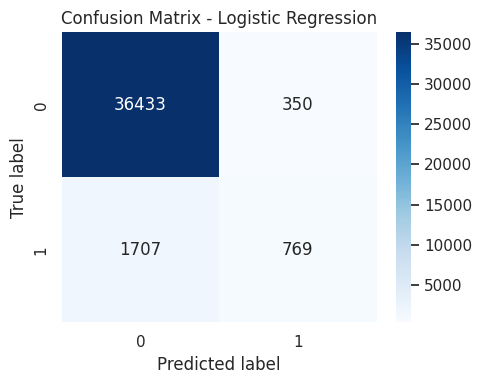

In [45]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_enc, y_train)
y_pred_logreg = logreg.predict(X_test_enc)
evaluate_classifier("Logistic Regression", y_test, y_pred_logreg)

## Random Tree


=== Random Forest ===
Accuracy : 0.9535
Precision: 0.7647  (average='binary')
Recall   : 0.3792  (average='binary')
F1-score : 0.5070  (average='binary')

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     36783
           1       0.76      0.38      0.51      2476

    accuracy                           0.95     39259
   macro avg       0.86      0.69      0.74     39259
weighted avg       0.95      0.95      0.95     39259

Confusion matrix:
 [[36494   289]
 [ 1537   939]]


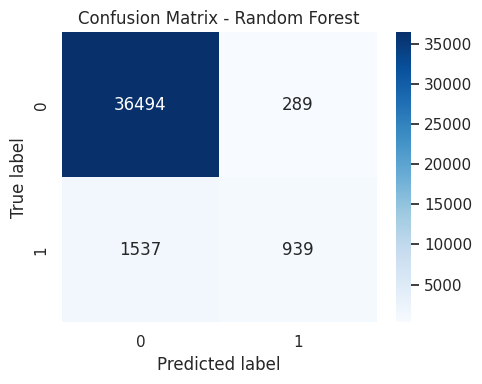

In [46]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
)

rf.fit(X_train_enc, y_train)
y_pred_rf = rf.predict(X_test_enc)
evaluate_classifier("Random Forest", y_test, y_pred_rf)

# XGBoot


=== XGBoost ===
Accuracy : 0.9580
Precision: 0.7628  (average='binary')
Recall   : 0.4859  (average='binary')
F1-score : 0.5936  (average='binary')

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     36783
           1       0.76      0.49      0.59      2476

    accuracy                           0.96     39259
   macro avg       0.86      0.74      0.79     39259
weighted avg       0.95      0.96      0.95     39259

Confusion matrix:
 [[36409   374]
 [ 1273  1203]]


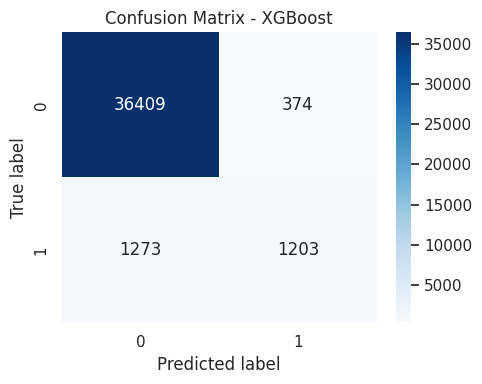

In [47]:
X_train_xgb = X_train_enc.to_numpy()
X_test_xgb = X_test_enc.to_numpy()

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42,
)

xgb.fit(X_train_xgb, y_train)
y_pred_xgb = xgb.predict(X_test_xgb)
evaluate_classifier("XGBoost", y_test, y_pred_xgb)


# MLP

In [48]:
# X_train_enc, X_test_enc, y_train, y_test

X_train_nn = X_train_enc.to_numpy()
X_test_nn = X_test_enc.to_numpy()
y_train_nn = y_train.to_numpy()
y_test_nn = y_test.to_numpy()

print(X_train_nn.shape, X_test_nn.shape)


(157035, 408) (39259, 408)


In [49]:
input_dim = X_train_nn.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),                   # Avoid overfitting
    layers.Dense(1, activation="sigmoid")  # Binary Classification
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        26,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,289 (110.50 KB)

 Trainable params: 28,289 (110.50 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(
    X_train_nn, y_train_nn,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9035 - loss: 8.8333 - val_accuracy: 0.9399 - val_loss: 0.6379
Epoch 2/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9331 - loss: 1.0713 - val_accuracy: 0.9397 - val_loss: 0.2047
Epoch 3/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9377 - loss: 0.2636 - val_accuracy: 0.9393 - val_loss: 0.1708
Epoch 4/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9373 - loss: 0.2172 - val_accuracy: 0.9361 - val_loss: 0.1643
Epoch 5/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9368 - loss: 0.1974 - val_accuracy: 0.9361 - val_loss: 0.1643
Epoch 6/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9379 - loss: 0.1880 - val_accuracy: 0.9356 - val_loss: 0.1595
Epoch 7/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9368 - loss: 0.1874 - val_accuracy: 0.9357 - val_loss: 0.1591
Epoch 8/30
982/982 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9361 - loss: 0.1856 - val_accuracy: 0.

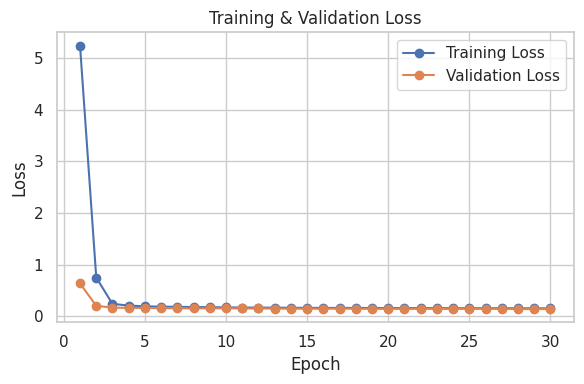

In [51]:
# Visualization
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(train_loss) + 1)

# Plot
plt.figure(figsize=(6,4))
plt.plot(epochs, train_loss, marker="o", label="Training Loss")
plt.plot(epochs, val_loss, marker="o", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
# Evaluate NN on test set
y_proba_nn = model.predict(X_test_nn).ravel()  # shape: (n_samples,)
y_pred_nn = (y_proba_nn >= 0.5).astype(int)

print("NN Accuracy:", accuracy_score(y_test_nn, y_pred_nn))
print("NN Precision:", precision_score(y_test_nn, y_pred_nn))
print("NN Recall:", recall_score(y_test_nn, y_pred_nn))
print("NN F1-score:", f1_score(y_test_nn, y_pred_nn))

print("\nNN Classification report:\n", classification_report(y_test_nn, y_pred_nn))


1227/1227 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
NN Accuracy: 0.9370335464479482
NN Precision: 0.625
NN Recall: 0.004038772213247173
NN F1-score: 0.008025682182985553

NN Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     36783
           1       0.62      0.00      0.01      2476

    accuracy                           0.94     39259
   macro avg       0.78      0.50      0.49     39259
weighted avg       0.92      0.94      0.91     39259



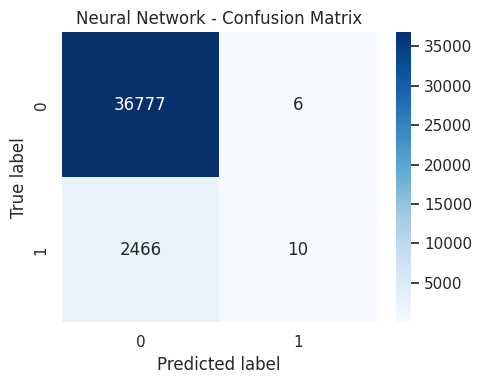

In [53]:
# Confusiom matrix
cm_nn = confusion_matrix(y_test_nn, y_pred_nn)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_nn,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[0, 1],
    yticklabels=[0, 1]
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Neural Network - Confusion Matrix")
plt.tight_layout()
plt.show()


# Task 2 - Customer Segmentation

In [65]:
# y doesn't attend clustering
y_income = df_d["label"]

# All features except the label
X_seg_raw = df_d.drop(columns=["label"])

# Distinguish numerical columns
numeric_cols = X_seg_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_seg_raw.select_dtypes(include=["object"]).columns.tolist()

print("numeric_cols:", numeric_cols)
print("categorical_cols:", categorical_cols)

# Construct preprocessors for clustering:
# Numerical -> standardized
# Category -> one-hot
preprocessor_seg = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ]
)

# Preprocess without train/test split
X_seg = preprocessor_seg.fit_transform(X_seg_raw)
print("After encoding, X_seg shape:", X_seg.shape)

# PCA dimensionality reduction: retain 90% of the information
pca = PCA(n_components=0.9, random_state=42)
X_pca = pca.fit_transform(X_seg)
print("After PCA, X_pca shape:", X_pca.shape)
print("Explained variance ratio sum:", pca.explained_variance_ratio_.sum())


numeric_cols: ['age', 'detailed industry recode', 'detailed occupation recode', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'weight', 'num persons worked for employer', 'own business or self employed', 'veterans benefits', 'weeks worked in year', 'year']
categorical_cols: ['class of worker', 'education', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizensh

## Helper Functions for Clustering

In [139]:
def plot_clusters_2d(X, labels, title):
    import numpy as np
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    # DataFrame -> ndarray
    if not isinstance(X, np.ndarray):
        X = X.to_numpy()

    pca_vis = PCA(n_components=2, random_state=42)
    X_2d = pca_vis.fit_transform(X)

    X_2d = np.asarray(X_2d)
    labels = np.asarray(labels)

    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(
        X_2d[:, 0],
        X_2d[:, 1],
        c=labels,
        cmap="tab10",
        s=10,
        alpha=0.6
    )
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(scatter, label="Cluster ID")
    plt.tight_layout()
    plt.show()


In [140]:
# numeric features（int64 / float64）
numeric_features = df_d.select_dtypes(include=["int64", "float64"]).columns.tolist()

# categorical features（object / category）
categorical_features = df_d.select_dtypes(include=["object", "category"]).columns.tolist()

print("📌 Numeric features:")
print(numeric_features)
print("\n📌 Categorical features:")
print(categorical_features)


📌 Numeric features:
['age', 'detailed industry recode', 'detailed occupation recode', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'weight', 'num persons worked for employer', 'own business or self employed', 'veterans benefits', 'weeks worked in year', 'year', 'label']

📌 Categorical features:
['class of worker', 'education', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of b

In [141]:

def describe_clusters(labels, y_income, df_original, top_n_cat=3):
    """
    Given cluster labels and the original data, print:
      1. Cluster size and high-income rate
      2. Selected numeric feature means
      3. Top categories for selected categorical columns

    Parameters
    ----------
    labels : array-like, shape (n_samples,)
        Cluster labels for each sample (e.g., from KMeans).
    y_income : array-like, shape (n_samples,)
        Binary income label (0/1) or similar.
    df_original : pd.DataFrame, shape (n_samples, n_features)
        Original dataframe containing all features.
    top_n_cat : int, default=3
        Number of top categories to show per cluster for each categorical column.
    """
    # Work on a copy to avoid modifying the original dataframe
    df = df_original.copy()
    df["cluster"] = labels
    df["label"] = y_income

    # ----------------------------------------------------------------------
    # 1) Cluster size & high-income rate
    # ----------------------------------------------------------------------
    print("Cluster size & high-income rate:")
    cluster_stats = df.groupby("cluster")["label"].agg(
        count="count",
        high_income_rate=lambda x: np.mean(x)  # assuming label is 0/1
    )
    print(cluster_stats, "\n")

    # ----------------------------------------------------------------------
    # 2) Numeric feature means by cluster
    #    Only keep columns that actually exist in df
    # ----------------------------------------------------------------------
    num_cols_to_show = [
        c for c in [
            "age",
            "detailed industry recode",
            "detailed occupation recode",
            "wage per hour",
            "capital gains",
            "capital losses",
            "dividends from stocks",
            "weight",
            "num persons worked for employer",
            "own business or self employed",
            "veterans benefits",
            "weeks worked in year",
            "year"
        ] if c in df.columns
    ]

    if num_cols_to_show:
        print("Numeric feature means by cluster:")
        num_means = df.groupby("cluster")[num_cols_to_show].mean()
        print(num_means, "\n")

    # ----------------------------------------------------------------------
    # 3) Categorical feature: top categories within each cluster
    #    We only keep categorical columns that exist in df, and then
    #    we only show the first `top_n_cat` of them.
    # ----------------------------------------------------------------------
    cat_cols_to_show = [
        c for c in [
            "class of worker",
            "education",
            "enroll in edu inst last wk",
            "marital stat",
            "major industry code",
            "major occupation code",
            "race",
            "hispanic origin",
            "sex",
            "member of a labor union",
            "reason for unemployment",
            "full or part time employment stat",
            "tax filer stat",
            "region of previous residence",
            "state of previous residence",
            "detailed household and family stat",
            "detailed household summary in household",
            "migration code-change in msa",
            "migration code-change in reg",
            "migration code-move within reg",
            "live in this house 1 year ago",
            "migration prev res in sunbelt",
            "family members under 18",
            "country of birth father",
            "country of birth mother",
            "country of birth self",
            "citizenship",
            "fill inc questionnaire for veteran's admin"
        ] if c in df.columns
    ][:top_n_cat]  # only show the first `top_n_cat` categorical columns

    clusters = sorted(df["cluster"].unique())

    for col in cat_cols_to_show:
        print(f"Top categories of '{col}' in each cluster:")
        for cl in clusters:
            # Filter rows for the current cluster
            sub = df.loc[df["cluster"] == cl, col]

            # Normalized value counts (i.e., proportions), then take top `top_n_cat`
            counts = sub.value_counts(normalize=True).head(top_n_cat)

            print(f"  Cluster {cl}:")
            # Pretty print: category name + proportion
            for cat, p in counts.items():
                print(f"    {cat!r:40s}  {p:6.3f}")
        print("\n" + "-" * 60 + "\n")

    return cluster_stats


## Kmeans

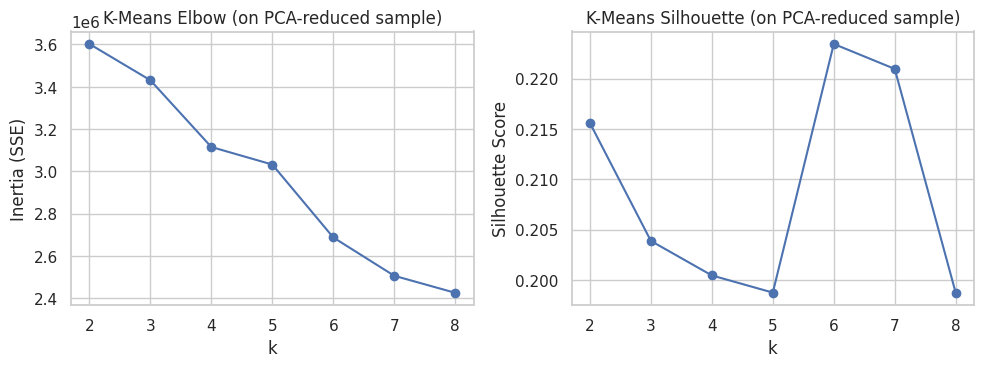

In [147]:
X_for_k = X_pca
# if X_pca.shape[0] > 5000:
#     X_for_k = resample(X_pca, n_samples=25000, random_state=42)

inertias = []
sil_scores = []
K_range = range(2, 9)

for k in K_range:
    kmeans_tmp = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels_k = kmeans_tmp.fit_predict(X_for_k)
    inertias.append(kmeans_tmp.inertia_)
    sil_scores.append(silhouette_score(X_for_k, labels_k))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(K_range, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia (SSE)")
plt.title("K-Means Elbow (on PCA-reduced sample)")

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("K-Means Silhouette (on PCA-reduced sample)")

plt.tight_layout()
plt.show()


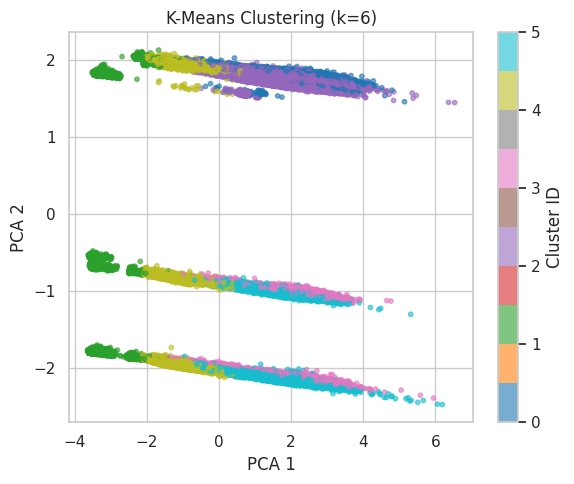

In [148]:
k_opt = 6

kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init="auto")
kmeans_labels = kmeans.fit_predict(X_seg)

plot_clusters_2d(X_seg, kmeans_labels, f"K-Means Clustering (k={k_opt})")


In [149]:
print("=== K-Means cluster description ===")
kmeans_stats = describe_clusters(kmeans_labels, df_d["label"], df_d)

=== K-Means cluster description ===
Cluster size & high-income rate:
         count  high_income_rate
cluster                         
0         9438          0.106061
1        49528          0.000000
2        41152          0.125316
3         8294          0.078852
4        45505          0.016306
5        42377          0.113930 

Numeric feature means by cluster:
               age  detailed industry recode  detailed occupation recode  \
cluster                                                                    
0        34.692837                 29.912481                   21.533270   
1         7.907709                  0.000081                    0.000283   
2        39.425642                 30.473829                   22.332645   
3        33.462503                 29.800940                   22.022546   
4        56.497660                  0.007691                    0.004791   
5        39.324468                 30.179484                   22.426293   

         wage per hour

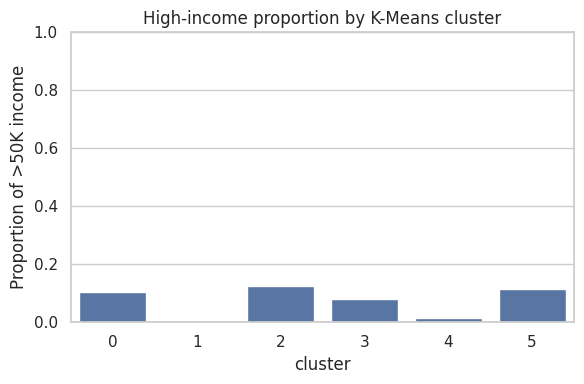


Cluster income summary:
   cluster  high_income_rate  count
0        0          0.106061   9438
1        1          0.000000  49528
2        2          0.125316  41152
3        3          0.078852   8294
4        4          0.016306  45505
5        5          0.113930  42377


In [150]:
# Visualize High-Income Rate per K-Means Cluster
df_seg = df_d.copy()
df_seg["cluster"] = kmeans_labels

# Convert label to 0/1 if not already
df_seg["income_bin"] = df_seg["label"].astype(int)

cluster_income = (
    df_seg.groupby("cluster")["income_bin"]
          .agg(high_income_rate="mean", count="count")
          .reset_index()
)

plt.figure(figsize=(6, 4))
sns.barplot(data=cluster_income, x="cluster", y="high_income_rate")
plt.ylim(0, 1)
plt.ylabel("Proportion of >50K income")
plt.title("High-income proportion by K-Means cluster")
plt.tight_layout()
plt.show()

print("\nCluster income summary:")
print(cluster_income)


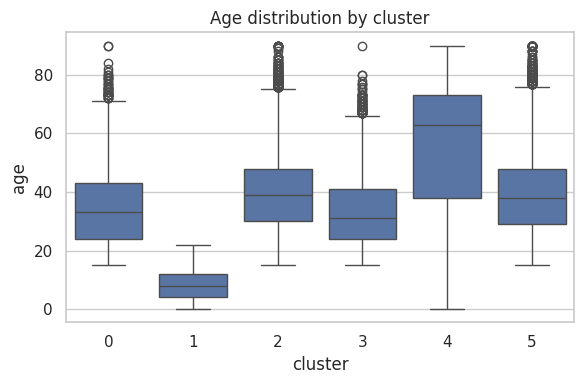

In [151]:
# Age distribution
plt.figure(figsize=(6,4))
sns.boxplot(data=df_seg, x="cluster", y="age")
plt.title("Age distribution by cluster")
plt.tight_layout()
plt.show()


class of worker distribution by cluster (row-normalized):
age            0         1         2         3         4         5         6   \
cluster                                                                         
0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1        0.053344  0.059643  0.061137  0.061743  0.062752  0.062369  0.060854   
2        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4        0.000022  0.000000  0.000066  0.000022  0.000000  0.000022  0.000000   
5        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

age            7         8         9         10        11        12        13  \
cluster                                                                         
0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1        0.060148  0.060653  0.059381  0.059098  0

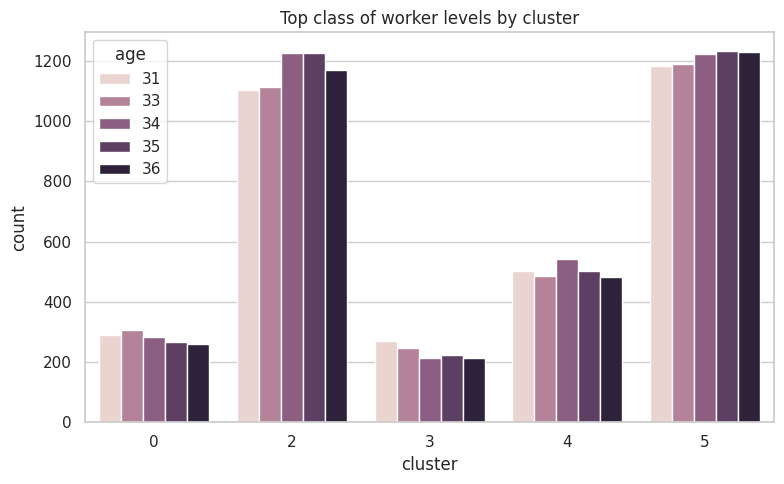

In [152]:
# Age level vs cluster
if "age" in df_seg.columns:
    edu_ct = pd.crosstab(df_seg["cluster"], df_seg["age"], normalize="index")

    print("class of worker distribution by cluster (row-normalized):")
    print(edu_ct)

    top_edu = df_seg["age"].value_counts().head(5).index

    plt.figure(figsize=(8,5))
    edu_melt = (df_seg[df_seg["age"].isin(top_edu)]
                .groupby(["cluster", "age"])
                .size()
                .reset_index(name="count"))
    sns.barplot(data=edu_melt, x="cluster", y="count", hue="age")
    plt.title("Top class of worker levels by cluster")
    plt.tight_layout()
    plt.show()



In [153]:
df_seg.columns

Index(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'ow

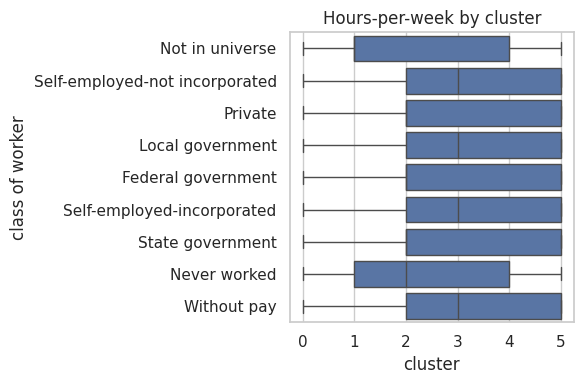

In [154]:
# class of worker
if "class of worker" in df_seg.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_seg, x="cluster", y="class of worker")
    plt.title("Hours-per-week by cluster")
    plt.tight_layout()
    plt.show()


class of worker distribution by cluster (row-normalized):
class of worker  Federal government  Local government  Never worked  \
cluster                                                               
0                          0.020873          0.074168      0.000318   
1                          0.000000          0.000000      0.004321   
2                          0.031663          0.077274      0.000097   
3                          0.020497          0.082469      0.000121   
4                          0.000022          0.000000      0.004637   
5                          0.029592          0.075961      0.000118   

class of worker  Not in universe   Private  Self-employed-incorporated  \
cluster                                                                  
0                       0.051494  0.713287                    0.019602   
1                       0.995659  0.000020                    0.000000   
2                       0.015990  0.713525                    0.034263   
3  

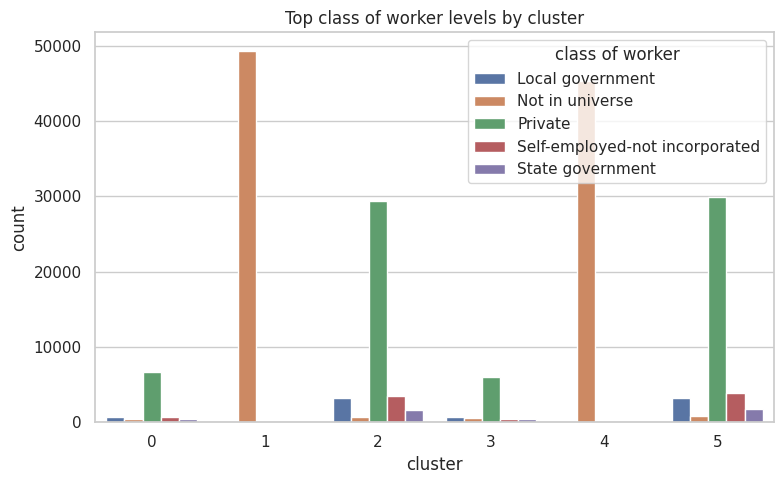

In [155]:
# class of worker
if "class of worker" in df_seg.columns:
    edu_ct = pd.crosstab(df_seg["cluster"], df_seg["class of worker"], normalize="index")

    print("class of worker distribution by cluster (row-normalized):")
    print(edu_ct)

    top_edu = df_seg["class of worker"].value_counts().head(5).index

    plt.figure(figsize=(8,5))
    edu_melt = (df_seg[df_seg["class of worker"].isin(top_edu)]
                .groupby(["cluster", "class of worker"])
                .size()
                .reset_index(name="count"))
    sns.barplot(data=edu_melt, x="cluster", y="count", hue="class of worker")
    plt.title("Top class of worker levels by cluster")
    plt.tight_layout()
    plt.show()



Education distribution by cluster (row-normalized):
education  10th grade  11th grade  12th grade no diploma  \
cluster                                                    
0            0.027230    0.038038               0.009748   
1            0.026914    0.012054               0.002221   
2            0.033874    0.036936               0.010911   
3            0.032313    0.042440               0.014468   
4            0.063026    0.054653               0.017624   
5            0.033485    0.036506               0.013026   

education  1st 2nd 3rd or 4th grade  5th or 6th grade  7th and 8th grade  \
cluster                                                                    
0                          0.003602          0.007629           0.012926   
1                          0.000101          0.000464           0.025359   
2                          0.007387          0.015965           0.022794   
3                          0.003858          0.006752           0.012780   
4          

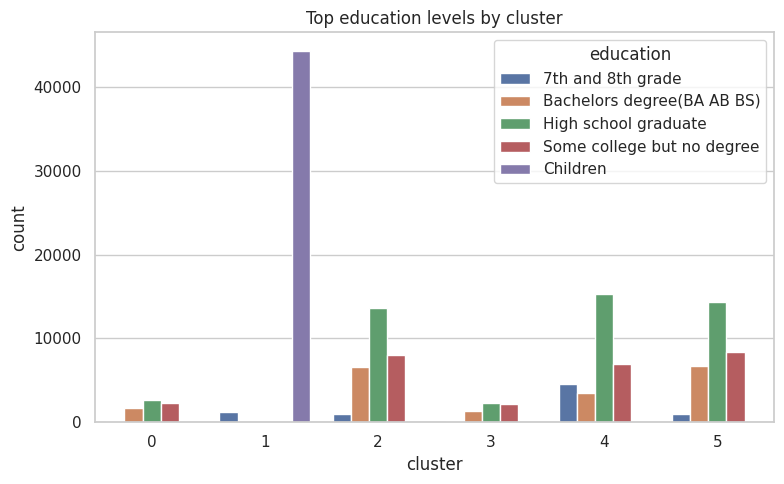

In [156]:
# Education level vs cluster
if "education" in df_seg.columns:
    edu_ct = pd.crosstab(df_seg["cluster"], df_seg["education"], normalize="index")

    print("Education distribution by cluster (row-normalized):")
    print(edu_ct)

    top_edu = df_seg["education"].value_counts().head(5).index

    plt.figure(figsize=(8,5))
    edu_melt = (df_seg[df_seg["education"].isin(top_edu)]
                .groupby(["cluster", "education"])
                .size()
                .reset_index(name="count"))
    sns.barplot(data=edu_melt, x="cluster", y="count", hue="education")
    plt.title("Top education levels by cluster")
    plt.tight_layout()
    plt.show()


sex distribution by cluster (row-normalized):
sex        Female      Male
cluster                    
0        0.458466  0.541534
1        0.491338  0.508662
2        0.475676  0.524324
3        0.466241  0.533759
4        0.663663  0.336337
5        0.474220  0.525780


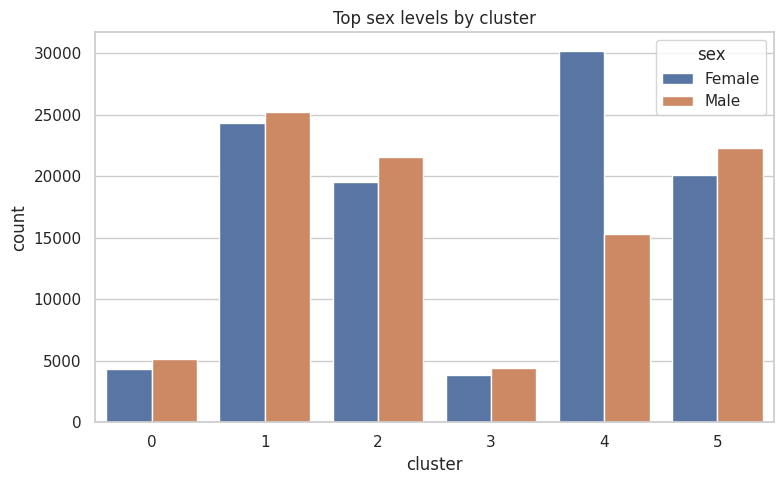

In [157]:
# sex vs cluster
if "sex" in df_seg.columns:
    edu_ct = pd.crosstab(df_seg["cluster"], df_seg["sex"], normalize="index")

    print("sex distribution by cluster (row-normalized):")
    print(edu_ct)

    top_edu = df_seg["sex"].value_counts().head(5).index

    plt.figure(figsize=(8,5))
    edu_melt = (df_seg[df_seg["sex"].isin(top_edu)]
                .groupby(["cluster", "sex"])
                .size()
                .reset_index(name="count"))
    sns.barplot(data=edu_melt, x="cluster", y="count", hue="sex")
    plt.title("Top sex levels by cluster")
    plt.tight_layout()
    plt.show()


sex distribution by cluster (row-normalized):
major occupation code  Adm support including clerical  Armed Forces  \
cluster                                                               
0                                            0.139754      0.000318   
1                                            0.000000      0.000000   
2                                            0.147478      0.000292   
3                                            0.143236      0.000362   
4                                            0.000088      0.000000   
5                                            0.147627      0.000425   

major occupation code  Executive admin and managerial  \
cluster                                                 
0                                            0.105955   
1                                            0.000000   
2                                            0.129617   
3                                            0.091150   
4                                          

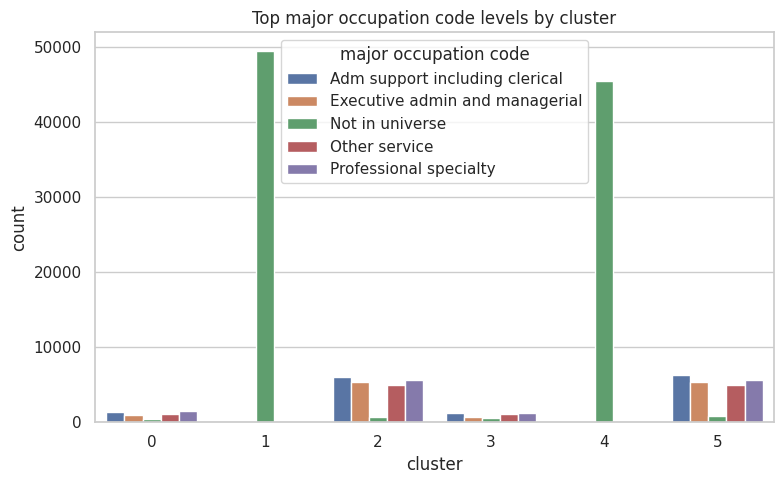

In [158]:
# major occupation code vs cluster
if "major occupation code" in df_seg.columns:
    edu_ct = pd.crosstab(df_seg["cluster"], df_seg["major occupation code"], normalize="index")

    print("sex distribution by cluster (row-normalized):")
    print(edu_ct)

    top_edu = df_seg["major occupation code"].value_counts().head(5).index

    plt.figure(figsize=(8,5))
    edu_melt = (df_seg[df_seg["major occupation code"].isin(top_edu)]
                .groupby(["cluster", "major occupation code"])
                .size()
                .reset_index(name="count"))
    sns.barplot(data=edu_melt, x="cluster", y="count", hue="major occupation code")
    plt.title("Top major occupation code levels by cluster")
    plt.tight_layout()
    plt.show()


sex distribution by cluster (row-normalized):
weeks worked in year        0         1         2         3         4   \
cluster                                                                  
0                     0.000000  0.001166  0.001483  0.001589  0.003602   
1                     0.984070  0.000848  0.000808  0.000646  0.001050   
2                     0.041164  0.001701  0.001628  0.001993  0.004447   
3                     0.000000  0.001688  0.001929  0.001326  0.001809   
4                     0.889858  0.005604  0.004966  0.004087  0.006505   
5                     0.043514  0.001699  0.002218  0.002147  0.004177   

weeks worked in year        5         6         7         8         9   \
cluster                                                                  
0                     0.001695  0.003285  0.000742  0.007311  0.001589   
1                     0.000707  0.001736  0.000384  0.002039  0.000283   
2                     0.001239  0.003572  0.000802  0.006707  0.0

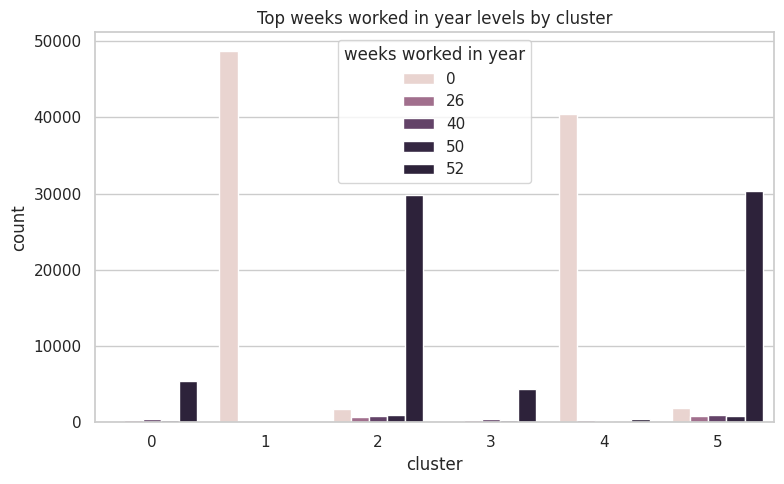

In [159]:
# weeks worked in year vs cluster
if "weeks worked in year" in df_seg.columns:
    edu_ct = pd.crosstab(df_seg["cluster"], df_seg["weeks worked in year"], normalize="index")

    print("sex distribution by cluster (row-normalized):")
    print(edu_ct)

    top_edu = df_seg["weeks worked in year"].value_counts().head(5).index

    plt.figure(figsize=(8,5))
    edu_melt = (df_seg[df_seg["weeks worked in year"].isin(top_edu)]
                .groupby(["cluster", "weeks worked in year"])
                .size()
                .reset_index(name="count"))
    sns.barplot(data=edu_melt, x="cluster", y="count", hue="weeks worked in year")
    plt.title("Top weeks worked in year levels by cluster")
    plt.tight_layout()
    plt.show()


sex distribution by cluster (row-normalized):
citizenship  Foreign born- Not a citizen of U S   \
cluster                                            
0                                       0.047468   
1                                       0.037009   
2                                       0.084686   
3                                       0.045696   
4                                       0.088254   
5                                       0.076079   

citizenship  Foreign born- U S citizen by naturalization  \
cluster                                                    
0                                               0.019919   
1                                               0.003796   
2                                               0.040606   
3                                               0.019773   
4                                               0.045182   
5                                               0.037379   

citizenship  Native- Born abroad of American Parent(s)  

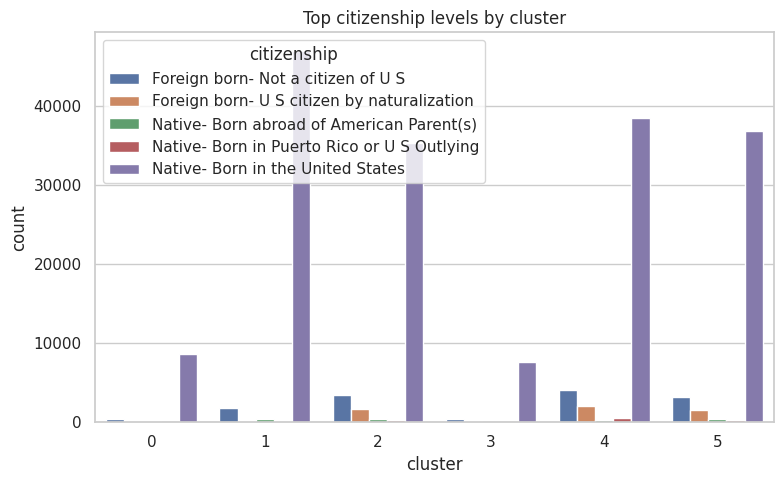

In [160]:
# citizenship vs cluster
if "citizenship" in df_seg.columns:
    edu_ct = pd.crosstab(df_seg["cluster"], df_seg["citizenship"], normalize="index")

    print("sex distribution by cluster (row-normalized):")
    print(edu_ct)

    top_edu = df_seg["citizenship"].value_counts().head(5).index

    plt.figure(figsize=(8,5))
    edu_melt = (df_seg[df_seg["citizenship"].isin(top_edu)]
                .groupby(["cluster", "citizenship"])
                .size()
                .reset_index(name="count"))
    sns.barplot(data=edu_melt, x="cluster", y="count", hue="citizenship")
    plt.title("Top citizenship levels by cluster")
    plt.tight_layout()
    plt.show()


# GMM

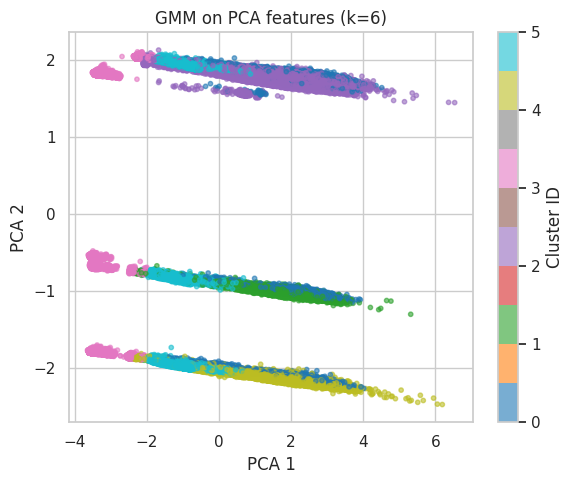

In [161]:
gmm = GaussianMixture(
    n_components=k_opt,
    covariance_type="full",
    random_state=42
)
gmm_labels = gmm.fit_predict(X_pca)

plot_clusters_2d(X_pca, gmm_labels, f"GMM on PCA features (k={k_opt})")


In [162]:

print("=== GMM cluster description ===")
gmm_stats = describe_clusters(gmm_labels, df_d['label'], df_d)

=== GMM cluster description ===
Cluster size & high-income rate:
         count  high_income_rate
cluster                         
0        13785          0.048966
1         7078          0.075869
2        44667          0.132514
3        48818          0.000000
4        37581          0.126101
5        44365          0.011541 

Numeric feature means by cluster:
               age  detailed industry recode  detailed occupation recode  \
cluster                                                                    
0        32.794342                 29.469061                   22.757490   
1        33.314919                 29.910427                   22.816615   
2        39.446459                 29.752793                   21.564914   
3         7.790221                  0.000000                    0.000000   
4        40.486709                 29.693382                   21.741359   
5        56.458537                  0.000000                    0.000000   

         wage per hour  ca